In [2]:
print("Hello world")

Hello world


In [3]:
import os
import keras 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

- Creating an Encoder Object:
  - An instance of the OneHotEncoder class is created and stored in the variable `encoder`.

- Fitting the Encoder:
  - The `fit()` method is used to teach the encoder about the categories it will encode.
  - The data [[0], [1]] is provided, indicating two categories: 0 and 1.

- Mapping Categories to Labels:
  - Categories 0 and 1 are labeled as "Tumor" and "Normal" respectively.

- One-Hot Encoding:
  - One-hot encoding converts categorical data into binary vectors.
  - Each category gets its binary representation with one "hot" (1) and all others "cold" (0).

- Usage:
  - After fitting with [[0], [1]], the encoder can transform categorical data.
  - For example, [[0]] becomes [[1, 0]], and [[1]] becomes [[0, 1]].


In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:

paths = []
for r, d, f in os.walk(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/Users/kartiksethi/Desktop/Mritumor/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [11]:
y_train.shape

(111, 2)

In [15]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 25.5127 - val_loss: 24.3388
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 9.3825 - val_loss: 16.0948
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 3.8548 - val_loss: 9.8913
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 3.5307 - val_loss: 12.4311
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 4.7446 - val_loss: 7.2324
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 1.3470 - val_loss: 12.4365
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 928ms/step - loss: 1.5281 - val_loss: 10.7558
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 932ms/step - loss: 0.3710 - val_loss: 7.6535
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 905ms/step - loss: 1.0738 - val_loss: 6.4295
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 917ms/step - loss: 0.4072 - val_loss: 5.0467
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 936ms/step - loss: 0.1240 - val_loss: 4.3688
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 867ms/step - loss: 0.4872 - val_loss: 3.9660
E

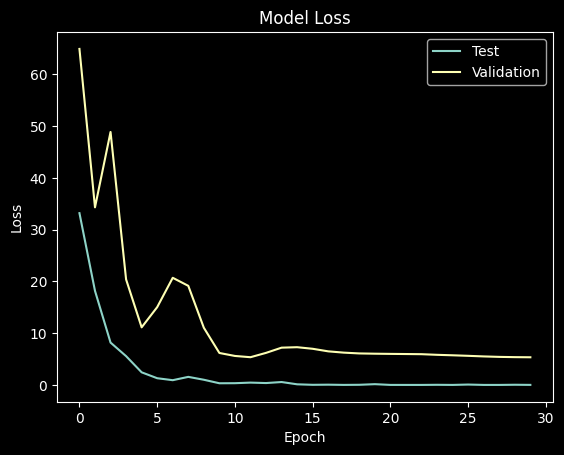

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [17]:
# Evaluate the model
test_loss = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 3.1732
Test Loss: 3.1732311248779297


In [18]:
from sklearn.metrics import accuracy_score

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

print("Test Accuracy:", test_accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Test Accuracy: 0.6785714285714286


In [19]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [20]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [ ]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt
# from IPython.display import display
# import time
# from PIL import Image

# # Define the function to get the class name
# def names(classification):
#     if classification == 0:
#         return "Tumor"
#     elif classification == 1:
#         return "Normal"
#     else:
#         return "Unknown"

# # Read the model
# # Assuming you have already loaded and compiled your Keras model and named it 'model'

# # Define the paths to the images
# image_paths = [
#     '/Users/kartiksethi/Desktop/Mritumor/brain_tumor_dataset/blur/Brain.jpg'
# ]

# # Loop through each image path
# for image_path in image_paths:
#     # Reading the image
#     img = cv2.imread(image_path)

#     # Denoising the image using median filter
#     dst = cv2.medianBlur(img, 5)  # Adjust kernel size as needed

#     start_time = time.time()

#     # Plotting the original and denoised image
#     plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title('Original Image')
#     plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
#     plt.title('Denoised Image')

#     end_time = time.time()

#     plt.show()
#     execution_time = end_time - start_time
#     print("Execution time for denoising:", execution_time, "seconds")

#     # Reading the image for classification
#     img = Image.open(image_path)
#     x = np.array(img.resize((128,128)))
#     x = x.reshape(1,128,128,3)
    
#     start_time = time.time()

#     # Predicting the class
#     res = model.predict_on_batch(x)
#     classification = np.argmax(res)

#     end_time = time.time()

#     # Displaying the image and prediction
#     plt.imshow(img)
#     plt.show()

#     execution_time = end_time - start_time
#     print("Execution time for classification:", execution_time, "seconds")
#     print("Confidence This Is " + names(classification) + ": " + str(res[0][classification]*100) + "%")


100.0% Confidence This Is A Its a Tumor


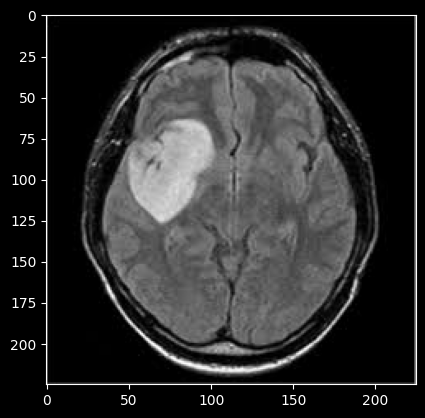

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes/Y4.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))
model.save('loc.keras') 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


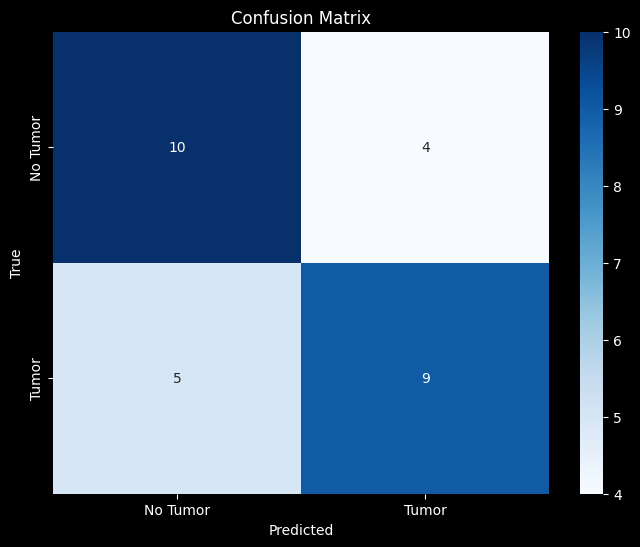

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
